# HW 10-1 RNN
---
(慣例的基本套件載入與資料讀取)

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

print('訓練總筆數:', len(x_train))
print('測試總筆數:', len(x_test))

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


訓練總筆數: 25000
測試總筆數: 25000


In [3]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)
x_train.shape

(25000, 150)

In [9]:
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM
from keras.layers import concatenate, add
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

以上都跟上課一樣，先用 Functional API 改寫上課的模型：

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 150)               0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 150, 3)            30000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 4)                 128       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


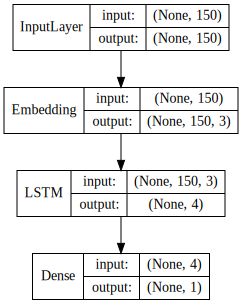

In [19]:
N = 3
K = 4
vis = Input(shape=(150,))
l1 = Embedding(10000, N)(vis)
l2 = LSTM(K)(l1)
opt = Dense(1, activation='sigmoid')(l2)

model = Model(inputs=vis, outputs=opt)
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model, show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [20]:
model.fit(x_train, y_train, batch_size=32, epochs=5)
score = model.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

Epoch 1/5
25000/25000 [==============================] - 52s 2ms/step - loss: 0.5276 - acc: 0.7612
Epoch 2/5
25000/25000 [==============================] - 58s 2ms/step - loss: 0.3122 - acc: 0.8828
Epoch 3/5
25000/25000 [==============================] - 56s 2ms/step - loss: 0.2349 - acc: 0.9156
Epoch 4/5
25000/25000 [==============================] - 53s 2ms/step - loss: 0.1947 - acc: 0.9330
Epoch 5/5
25000/25000 [==============================] - 8s 325us/step
測試資料的 loss = 0.38324258764743807
測試資正確率 = 0.85572


## 改良模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 150)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 150, 1000)         10000000  
_________________________________________________________________
dropout_9 (Dropout)          (None, 150, 1000)         0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               440400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 10,440,501
Trainable params: 10,440,501
Non-trainable params: 0
________________________________________________________________

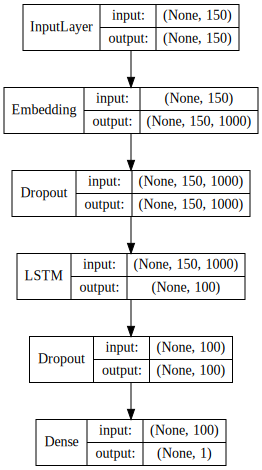

In [28]:
from keras.layers import Dropout
N = 1000
K = 100
vis = Input(shape=(150,))
l1 = Embedding(10000, N)(vis)
do1 = Dropout(0.25)(l1)
l2 = LSTM(K)(do1)
do2 = Dropout(0.25)(l2)
opt = Dense(1, activation='sigmoid')(do2)

model2 = Model(inputs=vis, outputs=opt)
model2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model2.summary()
SVG(model_to_dot(model2, show_shapes=True,
                 show_layer_names=False).create(prog='dot', format='svg'))

In [29]:
model2.fit(x_train, y_train, batch_size=32, epochs=5)
score2 = model2.evaluate(x_test, y_test)
print(f'測試資料的 loss = {score2[0]}')
print(f'測試資正確率 = {score2[1]}')

Epoch 1/5
25000/25000 [==============================] - 580s 23ms/step - loss: 0.4246 - acc: 0.8089
Epoch 2/5
25000/25000 [==============================] - 468s 19ms/step - loss: 0.2640 - acc: 0.8950
Epoch 3/5
25000/25000 [==============================] - 441s 18ms/step - loss: 0.1820 - acc: 0.9306
Epoch 4/5
25000/25000 [==============================] - 449s 18ms/step - loss: 0.1280 - acc: 0.9527
Epoch 5/5
25000/25000 [==============================] - 108s 4ms/step
測試資料的 loss = 0.49172719301462176
測試資正確率 = 0.85768


沒啥顯著改善